<img align="center" src="https://iili.io/3wI8gI.png" style="height:90px" style="width:30px"/>

# Multiple Linear Regression – Predicting Car Prices

In this lab your task is to build a Machine Learning algorithm that predicts the sales price of a car.

Picking the right data is a pivotal skill in machine learning, often overshadowing advanced algorithms. They enhance model performance by ensuring relevance and quality of data, thereby increasing accuracy and reducing complexity. To create the best possible model in this lab, you'll need to take time to think and reason about what drives the prices of cars.


In [3]:
# run cell to import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# run this cell to see explaination of columns
pd.read_excel("Data Dictionary - carprices.xlsx", header=3, usecols=["Unnamed: 7", "Unnamed: 11"], nrows=26)

,Unnamed: 7,Unnamed: 11
0,Car_ID,Unique id of each observation (Interger)
1,Symboling,"Its assigned insurance risk rating, A value of..."
2,carCompany,Name of car company (Categorical)
3,fueltype,Car fuel type i.e gas or diesel (Categorical)
4,aspiration,Aspiration used in a car (Categorical)
5,doornumber,Number of doors in a car (Categorical)
6,carbody,body of car (Categorical)
7,drivewheel,type of drive wheel (Categorical)
8,enginelocation,Location of car engine (Categorical)
9,wheelbase,Weelbase of car (Numeric)


## Import the `CarPrice_Assignment.csv` file and inspect the data carefully

In [5]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [6]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Transforming text to numbers

Supervised machine learning models can only understand numerical data which means that whenever we have text data in our dataset, we need to figure out a way to transform it into numbers. If you run the code below, you can see the different unique values in the object columns. There are different strategies to transform text into numbers.

Look at the output of each column and ask yourself: is column categorical and likely nominal, meaning they have no inherent order? Or, does this column seem to represent ordinal data, does it indicate a natural ordering? Or, does this column have too many unique values?

```python
for i in df.select_dtypes("object").columns:
    print(i)
    print(df[i].unique())
    print()
```

In [8]:
# look at the number of unique values in the columns that have object data type
for i in df.select_dtypes("object").columns:
    print(i)
    print(df[i].unique())
    print()

CarName
['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick ope

## Pick a transformation strategy

Depending on how you classified the columns in the previous question, you now have three options to choose from. If the columns is categorical and likely nominal, you should turn the data into dummies. If it represent ordinal data, you should map out numerical values for each text value. And finally, if the column has too many unique values, you should drop it.

<strong>To turn the columns into dummies:</strong>
```python
df = pd.get_dummies(data=df, columns=["here you put the columns you want to dummy"], drop_first=True)
```

<strong>To map out new numerical values for each text value:</strong>
```python
df["doornumber"] = df["doornumber"].map({"two":2, "four":4})
```

<strong>If the column has too many unique values:</strong>
```python
df.drop("column_you_want_to_drop", axis=1, inplace=True)
```


In [9]:
df = pd.get_dummies(data=df, columns=["fueltype", "aspiration", "carbody"], drop_first=True)

In [10]:
df["cylindernumber"] = df.cylindernumber.map({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8})

In [11]:
df["doornumber"] = df["doornumber"].map({"two":2, "four":4})

In [12]:
df.drop("CarName", axis=1, inplace=True)

In [13]:
df.drop("car_ID", axis=1, inplace=True)

## Exploratory Data Analysis

Use the `df.corr(numeric_only=True)` and then select the `price` column to see how your dependent variable correlates with your independent variables. You can also use the `sort_values` method and pass `key=abs` to sort the columns by correlation in absolute numbers.

In [14]:
df.corr(numeric_only=True)["price"].sort_values(key=abs, ascending=False)[1:]

enginesize           0.874145
curbweight           0.835305
horsepower           0.808139
carwidth             0.759325
cylindernumber       0.718305
highwaympg          -0.697599
citympg             -0.685751
carlength            0.682920
wheelbase            0.577816
boreratio            0.553173
carbody_hatchback   -0.262039
carbody_hardtop      0.225854
aspiration_turbo     0.177926
carbody_sedan        0.125716
carheight            0.119336
fueltype_gas        -0.105679
peakrpm             -0.085267
symboling           -0.079978
stroke               0.079443
compressionratio     0.067984
carbody_wagon       -0.042310
doornumber           0.031835
Name: price, dtype: float64

### Pick the nine most correlating independent variables and visualize them as regression plots

Use the `sns.regplot()` and pass the independent variable to the `x` axis and set `y="price"`. Remember to set `data=df`.

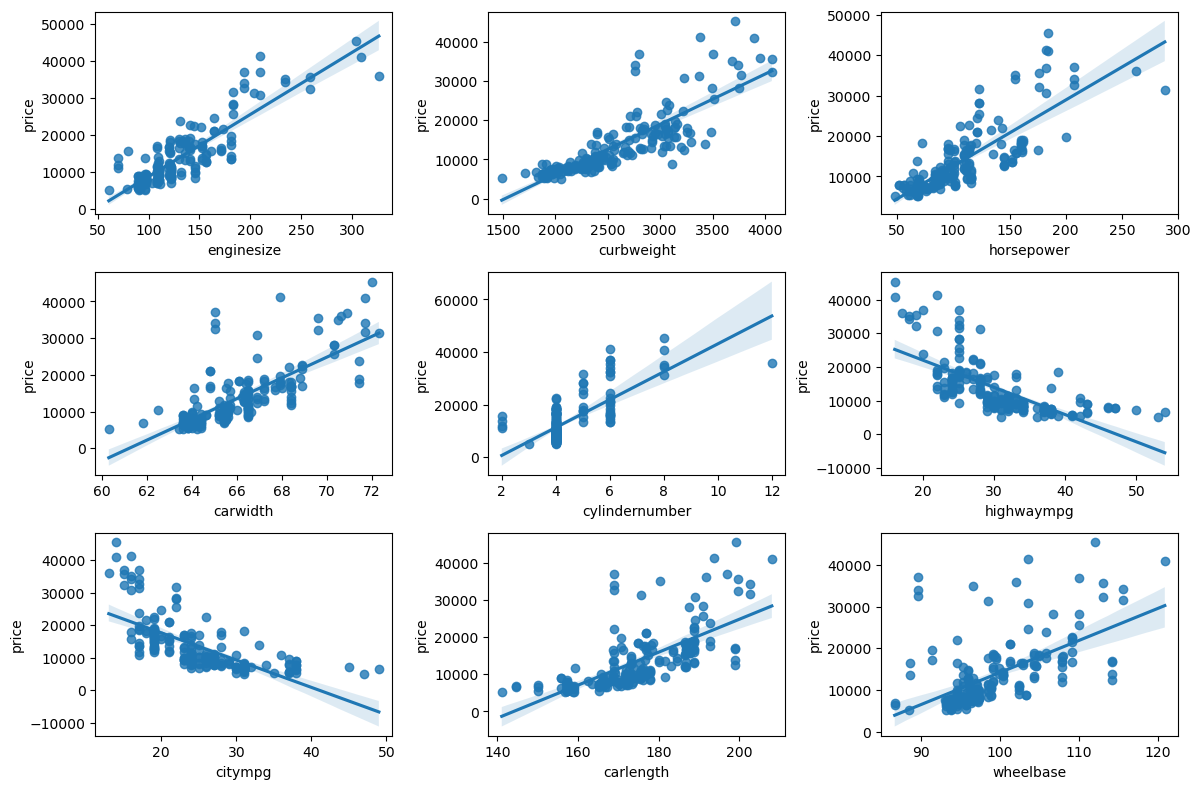

In [15]:
fig, ax = plt.subplots(3,3, figsize=(12,8))

sns.regplot(x='enginesize', y='price', data=df, ax=ax[0][0])
sns.regplot(x='curbweight', y='price', data=df, ax=ax[0][1])
sns.regplot(x='horsepower', y='price', data=df, ax=ax[0][2])
sns.regplot(x='carwidth', y='price', data=df, ax=ax[1][0])
sns.regplot(x='cylindernumber', y='price', data=df, ax=ax[1][1])
sns.regplot(x='highwaympg', y='price', data=df, ax=ax[1][2])
sns.regplot(x='citympg', y='price', data=df, ax=ax[2][0])
sns.regplot(x='carlength', y='price', data=df, ax=ax[2][1])
sns.regplot(x='wheelbase', y='price', data=df, ax=ax[2][2])

plt.tight_layout()

### Pick the nine most correlating independent variables and visualize them as histogram

Use the `sns.histplot()` and pass the independent variable to the `x` axis. Remember to set `data=df`.

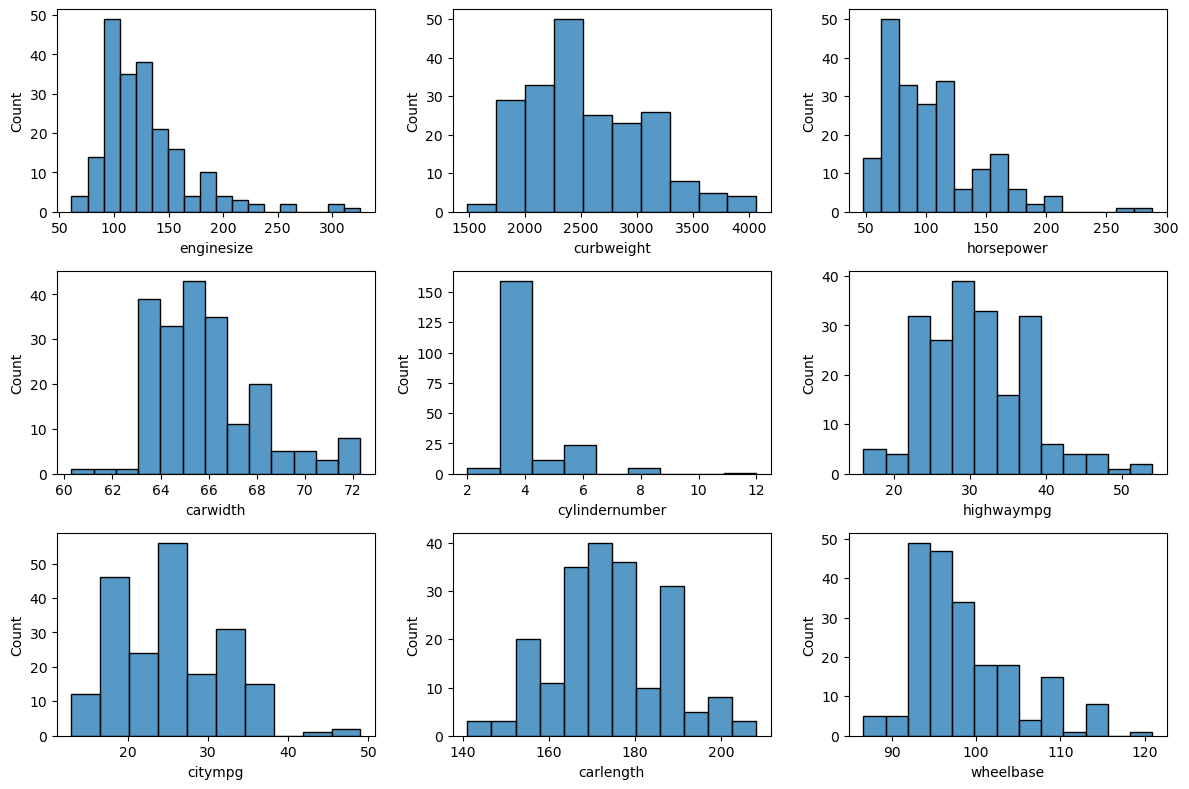

In [16]:
fig, ax = plt.subplots(3,3, figsize=(12,8))

sns.histplot(x='enginesize', data=df, ax=ax[0][0])
sns.histplot(x='curbweight', data=df, ax=ax[0][1])
sns.histplot(x='horsepower', data=df, ax=ax[0][2])
sns.histplot(x='carwidth', data=df, ax=ax[1][0])
sns.histplot(x='cylindernumber', data=df, ax=ax[1][1])
sns.histplot(x='highwaympg', data=df, ax=ax[1][2])
sns.histplot(x='citympg', data=df, ax=ax[2][0])
sns.histplot(x='carlength', data=df, ax=ax[2][1])
sns.histplot(x='wheelbase', data=df, ax=ax[2][2])

plt.tight_layout()

## Independent variables and dependent variable split

Set your independent variables equal to `X` and you dependent variable to `y`

In [17]:
# Split the data into X and y
X = df.select_dtypes("number").drop('price', axis=1)
y = df['price']

## Scaling the data

Scaling data in machine learning, particularly for algorithms like Linear Regression, is crucial as it ensures uniformity across features. Many algorithms, including Linear Regression, assume that all features have similar scales and are centered around zero. This uniformity is essential because it allows each feature to contribute equally to the model's predictions, preventing features with larger scales from disproportionately influencing the model. Additionally, for algorithms that rely on gradient descent for optimization, scaling can significantly improve the speed and stability of convergence towards the minimum.

However, when it comes to dummy variables, scaling is generally not performed. This is because dummy variables are binary, representing the presence or absence of a category with values 0 or 1, and scaling them would lead to a loss of this clear binary interpretation. Moreover, since dummy variables are already on a consistent scale, additional scaling does not provide the same benefits as it does for continuous variables. In the context of Linear Regression, keeping dummy variables unscaled maintains interpretability and efficiency without adversely affecting the model's performance.


<strong>Execute the follwing list comprehensions to separate the binary data from the data that we are going to scale. </strong>
    
```python
non_binary = X[[col for col in X.columns if X[col].nunique() > 2]]
binary = X[[col for col in X.columns if X[col].nunique() <= 2]]
```

In [19]:
# execute code here
non_binary = X[[col for col in X.columns if X[col].nunique() > 2]]
binary = X[[col for col in X.columns if X[col].nunique() <= 2]]

## Calculate the z-score


Calculating the z-score in the context of linear regression is primarily done to standardize the features, making them more comparable and interpretable. The z-score, a measure of how many standard deviations a data point is from the mean, transforms the features so that they have a mean of zero and a standard deviation of one. This standardization is particularly useful in linear regression as it allows for the comparison of coefficients on an equal footing. When features are on different scales, it's challenging to discern which ones have a more significant impact on the dependent variable. By standardizing, each coefficient reflects the impact of a one standard deviation change in the feature, making it easier to understand and compare the relative importance of each feature in the model. Additionally, standardizing can also aid in the convergence of the algorithm, especially in optimization processes like gradient descent, by ensuring that all features contribute equally to the model's learning process.

To calculate the z-score in python we can import a function from the scipy (scientific python) library. All you need to to is to take `non_binary` and pass `zscore` to the apply funciton and save it do a variable named `scaled`. 

In [ ]:
from scipy.stats import zscore

In [20]:
scaled = non_binary.apply(zscore)

Uncomment and runt the code below to check if you succeded with calculate. If successful, the average should be zero and the standard deviation should be 1.

In [22]:
# scaled.agg(["std", "mean"]).round()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0


## Train Test Split

The train-test split is a fundamental step in machine learning where the dataset is divided into two parts: the training set and the testing set. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance. This split is crucial as it helps in assessing how well the model generalizes to new, unseen data. Without this step, there's a risk of overfitting, where the model performs well on the training data but poorly on new data. The train-test split thus ensures a more realistic evaluation of the model's effectiveness and robustness.

Set the `test_size=0.2`

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## RFE | Preprocessing Step to Find the Best Estimators/Features

<strong> This step is a cool add-on that you don't need to over analyse. Just read the text and try to understand the code that has been given to you.</strong>

Recursive feature elimination (RFE) is a feature selection technique used in machine learning and statistics to select the most important features (columns) for a predictive model. RFE works by recursively removing features from the model and building a new model with the remaining features, until a specified number of features are left. It is a wrapper method, meaning that it uses a specific model (e.g. linear regression, support vector machines, etc.) to determine which features to eliminate.

The general steps for performing RFE are as follows:

**1. Choose a model: First, you need to choose a model that you want to use to perform feature selection. Common models used for RFE include linear regression, logistic regression, and support vector machines.**


**2. Specify the number of features: Next, you need to specify the number of features you want to end up with at the end of the feature selection process. This can be a fixed number or a percentage of the original features.**


**3. Eliminate the least important feature: The model is trained on the original set of features, and the importance of each feature is determined by examining the model's coefficients or weights. The least important feature is then eliminated from the set of features.**
 
 
**4. Build a new model: A new model is built using the remaining features, and steps 3 and 4 are repeated until the desired number of features is reached.**


**5. Evaluate the model: Finally, the model is evaluated using a validation set or cross-validation to assess the performance of the selected features.**

RFE can be a powerful feature selection technique, as it can help to improve the performance and interpretability of a model by selecting the most important features. However, it can be computationally intensive, especially when dealing with large numbers of features or complex models. It is also important to keep in mind that feature selection is not a panacea, and that it is always possible to select a suboptimal set of features. Therefore, it is always a good practice to combine feature selection with other techniques such as regularization and cross-validation to avoid overfitting and ensure robustness of the model.

In [24]:
#import libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Create a scikit-learn estimator from the OLS model
estimator = LinearRegression()

# Create the RFE object and fit the model
rfe = RFE(estimator, n_features_to_select=13)
rfe = rfe.fit(X_train, y_train)

# Print the selected features
print('Selected features:', X_train.columns[rfe.support_])

Selected features: Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'citympg', 'highwaympg'],
      dtype='object')


In [25]:
# Run this to move on with the columns selected after elimination.
rfe_cols = X_train.columns[rfe.support_]

## Build and Train predictive model

Initiate you `LinearRegression()` and then fit it to your data but remember to fit it using the `rfe_cols`. After fitting the model, predict prices and save it to `y_pred`.

In [26]:
estimator = LinearRegression()
estimator.fit(X_train[rfe_cols], y_train)
y_pred = estimator.predict(X_train[rfe_cols])

## Evaluate model on training data

Have a look at mean squared error, r2 score, mean absolute percentage error, mean absolute error and write a few comments on how you interpret the results.

In [27]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error

mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
mae_pct = mean_absolute_percentage_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print("TRAINING DATA\n")
print("MSE:",mse)
print("MAE:",mae)
print("MAE pct:",mae_pct)
print("R-squared", r2)

TRAINING DATA

MSE: 9663798.73648262
MAE: 2373.073534040034
MAE pct: 0.19127943529051922
R-squared 0.8379585987678633


## Evaluate model on test data

Create a new `y_pred` for the test data. Then, have a look at mean squared error, r2 score, mean absolute percentage error, mean absolute error and write a few comments on how you interpret the results. How does the scores differ from the training data. Does your model generalize well or poorly?

In [28]:
y_pred = estimator.predict(X_test[rfe_cols])

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mae_pct = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("TEST DATA\n")
print("MSE:",mse)
print("MAE:",mae)
print("MAE pct:",mae_pct)
print("R-squared", r2)

TEST DATA

MSE: 15925985.034966614
MAE: 2685.177503997818
MAE pct: 0.2509087227100393
R-squared 0.7982623021033576


# Good Job!